# Covid19
## Works on different public datasets

The purpose of this notebook is to provide an easy to run tool in order to have better insigts that those found in the press. Here we are going to handle with different files:
* [Instituto de Salud Carlos III](https://covid19.isciii.es/)
* [ISCIII Daily Mortality Monitoring MoMo](https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html)
* [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

### 0. Loading libraries


In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML, Markdown

### 1. ISCIII Dataset

This section will prepare those different datasets in order to make them more easy to work with. 

#### Preprocessing

Some considerations
* Separator: usually changes switching between ',' and ';'.
* Data is being updated via appending the new data (one record for each autonomous region) day by day, so the last records correspond with the more recent information.
* **DISCLAIMER**: data provided from media differs from data displayed at some points. Moreover, several other factors could change in this dataset (as the described separator or the addition of new columns). 

In [2]:
#Spanish dataset
df = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv", sep=',', encoding='iso-8859-1')

In [3]:
display(Markdown("#### Description"))
display(df.describe())
display(Markdown("#### Head"))
display(df.head())
display(Markdown("#### Tail"))
display(df.tail())

#### Description

,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
count,944.00000,471.000000,365.000000,1104.000000,1138.000000,1121.000000,1102.000000
mean,3688.81250,11181.588110,1079.980822,3033.242754,293.921793,658.752899,2550.533575
std,8079.31497,16279.630949,1279.901557,5725.394047,548.061804,1409.236485,5866.915971
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.75000,1874.500000,152.000000,156.000000,14.000000,8.000000,18.250000
50%,679.00000,3980.000000,649.000000,984.000000,105.500000,135.000000,475.000000
75%,3225.00000,12199.000000,1321.000000,3107.250000,308.000000,555.000000,1963.000000
max,54853.00000,63416.000000,6022.000000,41031.000000,3465.000000,8466.000000,38331.000000


#### Head

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AR,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IB,20/2/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CN,20/2/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Tail

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
1447,**Desde el día 28/04/2020 las cifras UCIs de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,*** Desde el día 11/04/2020 las cifras de hosp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,*** Desde el día 12/04/2020 las cifras de UCIs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,**** Desde el día 26/04/2020 las cifras de Hos...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,NOTA 3:Se excluyen de la serie las notificacio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['CCAA', 'FECHA', 'CASOS', 'PCR+', 'TestAc+', 'Hospitalizados', 'UCI',
       'Fallecidos', 'Recuperados'],
      dtype='object')

#### Dataset information

* ```CCAA```: region code
* ```FECHA```: date of the record
* ```CASOS```: new infections detected (mainly empty)
* ```PCR+```: referring to the ```CASOS``` means the new infections detected via a positive [PCR test](https://en.wikipedia.org/wiki/Polymerase_chain_reaction)
* ```TestAc+```: Similar to the ```PCR+```. Quick test focused on Antibodies
* ```Hospitalizados```: hospitalized people related with Covid-19
* ```UCI```: hospitalized people who require Intensive Care Units
* ```Fallecidos```: deceased people
* ```Recuperados```: recovered people

Let's have a look at their content. 

In [5]:
df.head()

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AR,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IB,20/2/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CN,20/2/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
1447,**Desde el día 28/04/2020 las cifras UCIs de ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,*** Desde el día 11/04/2020 las cifras de hosp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449,*** Desde el día 12/04/2020 las cifras de UCIs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,**** Desde el día 26/04/2020 las cifras de Hos...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,NOTA 3:Se excluyen de la serie las notificacio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['CCAA'].unique()

array(['AN', 'AR', 'AS', 'IB', 'CN', 'CB', 'CM', 'CL', 'CT', 'CE', 'VC',
       'EX', 'GA', 'MD', 'ML', 'MC', 'NC', 'PV', 'RI',
       'NOTA 1: El objetivo de los datos que se publican en esta web es saber el número de casos acumulados a la fecha y que por tanto no se puede deducir que la diferencia entre un día y el anterior es el número de casos nuevos ya que esos casos pueden haber sido recuperados de fechas anteriores. Cualquier inferencia que se haga sobre las diferencias de un día para otro deben hacerse con precaución y son únicamente la responsabilidad del autor.',
       'NOTA 2: Los datos de estas comunidades son datos de prevalencia (personas ingresadas a fecha de hoy). No reflejan el total de personas que han sido hospitalizadas o ingresadas en UCI\xa0 a lo largo del periodo de notificación(CL(UCIs*)-GA(UCIS**)-CM***-MD****)',
       '* Desde el día 17/04/2020 las cifras de UCIs de CL son casos acumulados. Previamente se refieren a personas ingresadas ese día.',
       '**D

#### Conclusions up to here

There are plenty of missing information and also a lot of noise in the data. Data is not properly indexed by date. In fact, data is being updated via appending the new data (one record for each region) day by day, so the last records correspond with the more recent information. The idea is to correct this problems and reconstruct the whole time series. Let's handle this. 

First of all, identify the region code in order to filter. 

In [8]:
region = ['AN', 'AR', 'AS', 'IB', 'CN',
         'CB', 'CM', 'CL', 'CT', 'CE',
         'VC', 'EX', 'GA', 'MD', 'ML',
         'MC', 'NC', 'PV', 'RI']


In [9]:
# Filter record based on valid region
df = df[df['CCAA'].isin(region)]

In [10]:
df.head()

,CCAA,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AR,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS,20/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IB,20/2/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CN,20/2/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Reconstruct time series

In this step we're going to fix some issues in data:
* Fill ```CASOS``` column. This could be calculated based on the difference between ```PCR+``` day by day
* Reconstruct the time series. At the moment, the features reflect the snapshot of the day by day, but there are no features representing the increments between dates. For this pupose, the reconstruction of the time series consist on calculate those increments on new features. In this manner, the following features will reflect the variation for those data respect the day before:
    * ```IncHospitalizados```
    * ```IncUCI```
    * ```IncFallecidos```
    * ```IncRescuperados```

In [11]:
def rebuildSeries(df, ndays):
    """
    df: Pandas DataFrame:  dataframe to reconstruct
    ndays: Integer: how many days to calculate backwards
    return: DataFrame reconstructed with new features
    """
    cols = ['FECHA', 'CCAA', 'CASOS', 'PCR+', 'TestAc+', 'Hospitalizados',
            'UCI', 'Fallecidos', 'Recuperados']
    rebuilt = list()
    for i in range(1,ndays + 1):
        limit = -(i-1)*len(region)
        if limit != 0:
            today = df.iloc[-i*len(region):limit]
        else:
            today = df.iloc[-i*len(region):]
        today = today.sort_values('CCAA')
        today['FECHA'] = (datetime.now() - timedelta(days=i-1)).strftime("%Y-%m-%d") 
        yesterday = df.iloc[-(i+1) *len(region):-i*len(region)].sort_values('CCAA')
        assert today.shape == yesterday.shape, "Shapes do not fit [{}] {} vs {}".format(i, 
                                                                                        today.shape,
                                                                                        yesterday.shape)
        today['CASOS'] = (today['PCR+'].reset_index() - yesterday['PCR+'].reset_index())['PCR+'].to_numpy()
        today = today[cols]
        for item in ['Hospitalizados', 'UCI', 'Fallecidos', 'Recuperados']:
            today['Inc' + item] = (today[item].reset_index() -
                                   yesterday[item].reset_index())[item].to_numpy()
        today.reset_index()
        rebuilt.append(today)
    rebuilt.reverse()
    return pd.concat(rebuilt, ignore_index=True)

#### Rebuild 30 days backwards

In [12]:
res = rebuildSeries(df, 30)

In [13]:
res.tail(20)

,FECHA,CCAA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,IncHospitalizados,IncUCI,IncFallecidos,IncRecuperados
550,2020-05-05,VC,64.0,10500.0,2383.0,5214.0,701.0,1279.0,7655.0,10.0,1.0,10.0,149.0
551,2020-05-06,AN,26.0,12236.0,2403.0,6012.0,740.0,1281.0,7679.0,29.0,2.0,14.0,449.0
552,2020-05-06,AR,24.0,5231.0,1151.0,2552.0,260.0,788.0,2790.0,13.0,0.0,18.0,86.0
553,2020-05-06,AS,2.0,2310.0,763.0,2081.0,142.0,287.0,953.0,35.0,0.0,3.0,17.0
554,2020-05-06,CB,6.0,2213.0,413.0,1018.0,79.0,199.0,1696.0,3.0,0.0,1.0,38.0
555,2020-05-06,CE,8.0,109.0,55.0,10.0,4.0,4.0,150.0,0.0,0.0,0.0,5.0
556,2020-05-06,CL,91.0,17520.0,4636.0,8246.0,538.0,1847.0,7036.0,93.0,1.0,15.0,101.0
557,2020-05-06,CM,64.0,16144.0,6022.0,8765.0,612.0,2647.0,5862.0,40.0,3.0,31.0,38.0
558,2020-05-06,CN,0.0,2231.0,0.0,920.0,176.0,143.0,1223.0,0.0,0.0,1.0,33.0
559,2020-05-06,CT,153.0,50924.0,1166.0,28085.0,2871.0,5345.0,22881.0,340.0,15.0,75.0,328.0


In [14]:
res[res['CCAA']=='CM'].tail()

,FECHA,CCAA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,IncHospitalizados,IncUCI,IncFallecidos,IncRecuperados
481,2020-05-02,CM,57.0,15967.0,5056.0,8645.0,601.0,2534.0,5702.0,27.0,5.0,36.0,87.0
500,2020-05-03,CM,50.0,16017.0,5273.0,8676.0,604.0,2565.0,5772.0,31.0,3.0,31.0,70.0
519,2020-05-04,CM,33.0,16050.0,5461.0,8698.0,606.0,2590.0,5794.0,22.0,2.0,25.0,22.0
538,2020-05-05,CM,30.0,16080.0,5576.0,8725.0,609.0,2616.0,5824.0,27.0,3.0,26.0,30.0
557,2020-05-06,CM,64.0,16144.0,6022.0,8765.0,612.0,2647.0,5862.0,40.0,3.0,31.0,38.0


### 1.2. Functions to explore data

Now we have our data well formatted, is time to explore. For this purpose, several functions are created to easy filter and plot the DataFrame. Interactive plots coming soon :D 

In [15]:
def displayInfo(df, location=None, date=None):
    """
    location: string: region code
    date: string: date to query format YYYY-MM-DD
    return: dataframe display
    """
    if date == 'today':
        date = datetime.now().strftime("%Y-%m-%d") 
    elif date != None:
        df = df[df['FECHA']== date]
    if location:
        df = df[df['CCAA']==location]
    else:
        df = df.groupby(['FECHA']).sum().reset_index()
    return display(df)
    
def showStats(df, location=None, from_date='2020-03-01', to_date=None, feature='IncFallecidos', aggregate=False):
    """
    df: Pandas DataFrame
    location: string: region code
    from_date: string: date to start the time window query. Format YYYY-MM-DD
    to_date: string: end of the time window query. Format YYYY-MM-DD
    feature: string: feature to plot
    aggregate: Boolean: if no location provided, aggregation is available
    return: None (plot info)
    """
    if location:
        print("Warning: aggregation not available")
    if location:
        df = df[df.CCAA==location]

    df = df[df.FECHA >= from_date]
    
    if to_date:
        df = df[df.FECHA >= to_date]

    dates = list(df.FECHA.unique())
    dates.sort(reverse=False)
    
    pal = sns.cubehelix_palette(len(df))
    rank = df[feature].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
    if not location and aggregate:
        df = df.groupby(['FECHA']).sum().reset_index()

    fig, ax = plt.subplots(1,1, figsize=(16,10))
    sns.barplot(data=df,
                x='FECHA',
                y=feature,
                label=feature,
                palette=np.array(pal[::1])[rank],
                color='lightblue',
#                hue='CCAA',
                order=dates,
                ax=ax)

    plt.xticks(rotation=90)
    plt.title("Evolution {} since {} of {}".format(location or "", from_date, feature, from_date))
    plt.legend()
    plt.show()

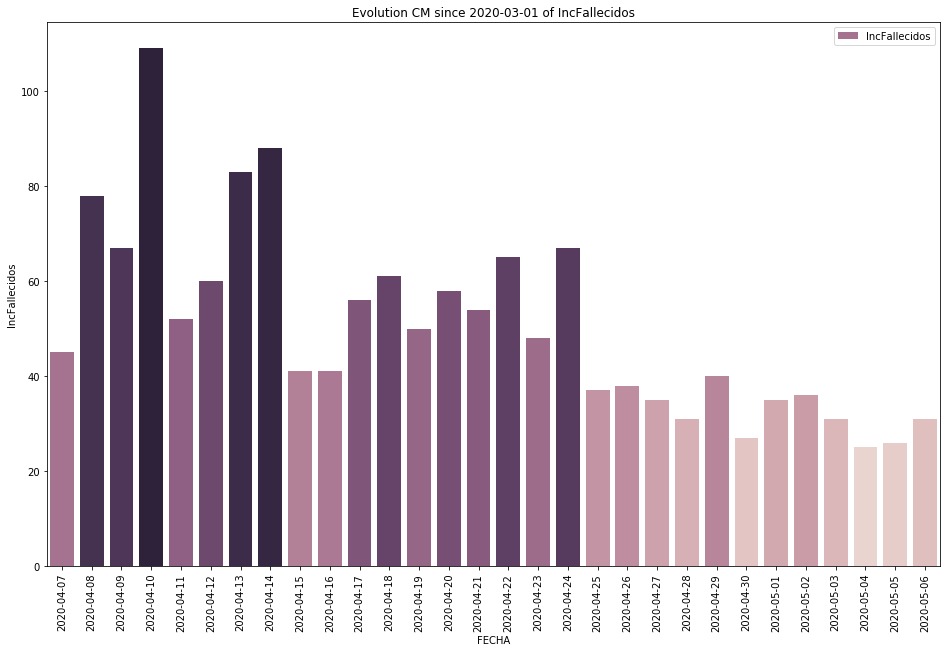

In [16]:
showStats(res, location='CM', feature='IncFallecidos')

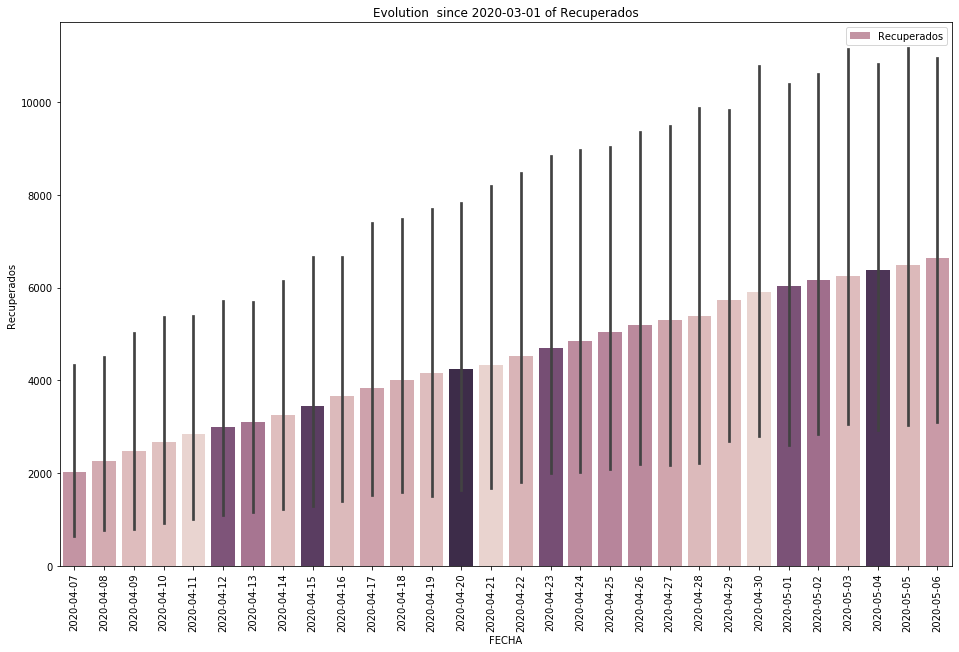

In [17]:
#No aggregation
showStats(res, location=None, feature='Recuperados', aggregate=False)

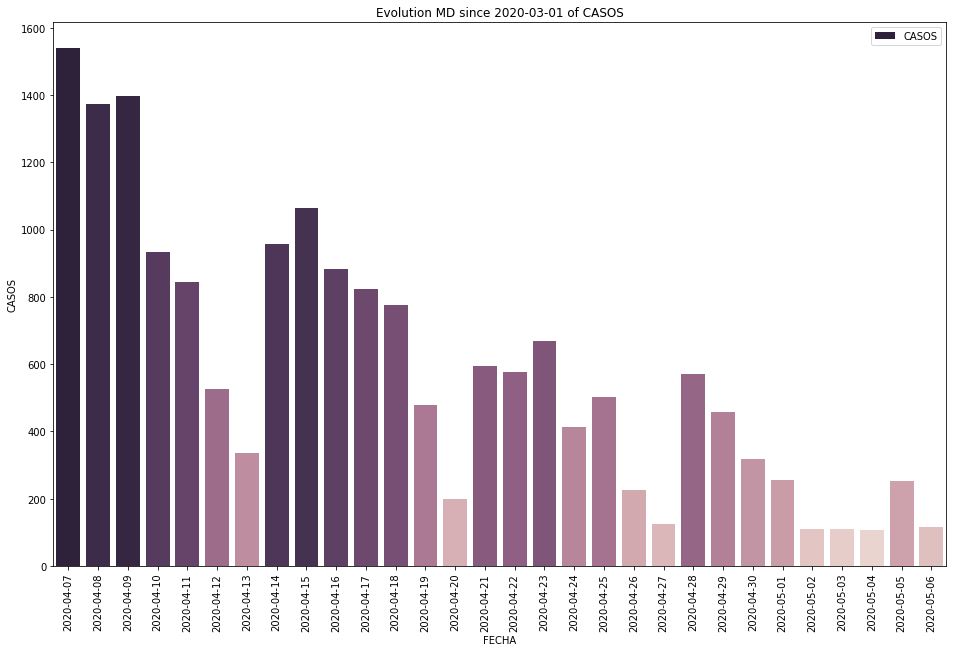

In [18]:
#Aggregated
showStats(res, location='MD', feature='CASOS', aggregate=False)

### Snipet for current situation

Use this cell in order to know from the official data ISCIII the evolution. 

* ```current_day```: controls actual day
* ```loc```: specify region or ```None```. Available regions are: 
```{python}
'AN', 'AR', 'AS', 'IB', 'CN',
'CB', 'CM', 'CL', 'CT', 'CE',
'VC', 'EX', 'GA', 'MD', 'ML',
'MC', 'NC', 'PV', 'RI'``` 

In [19]:
def checkSituation(loc=None):
    current_day = datetime.now().strftime("%Y-%m-%d")
    display(Markdown("#### TODAY'S DATA: {} ".format(current_day) + (loc if loc else "")))
    displayInfo(res, location=loc, date=current_day)
    display(Markdown("##### Evolution of cases: {} ".format(current_day) + (loc if loc else "")))
    showStats(res, location=loc, feature='CASOS', aggregate=False)
    display(Markdown("##### Evolution of deaths: {} ".format(current_day) + (loc if loc else "")))
    showStats(res, location=loc, feature='IncFallecidos', aggregate=False)

### Checking national situation

#### TODAY'S DATA: 2020-05-06 

,FECHA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,IncHospitalizados,IncUCI,IncFallecidos,IncRecuperados
0,2020-05-06,685.0,220325.0,33357.0,120466.0,11082.0,25857.0,126002.0,857.0,51.0,244.0,2516.0


##### Evolution of cases: 2020-05-06 

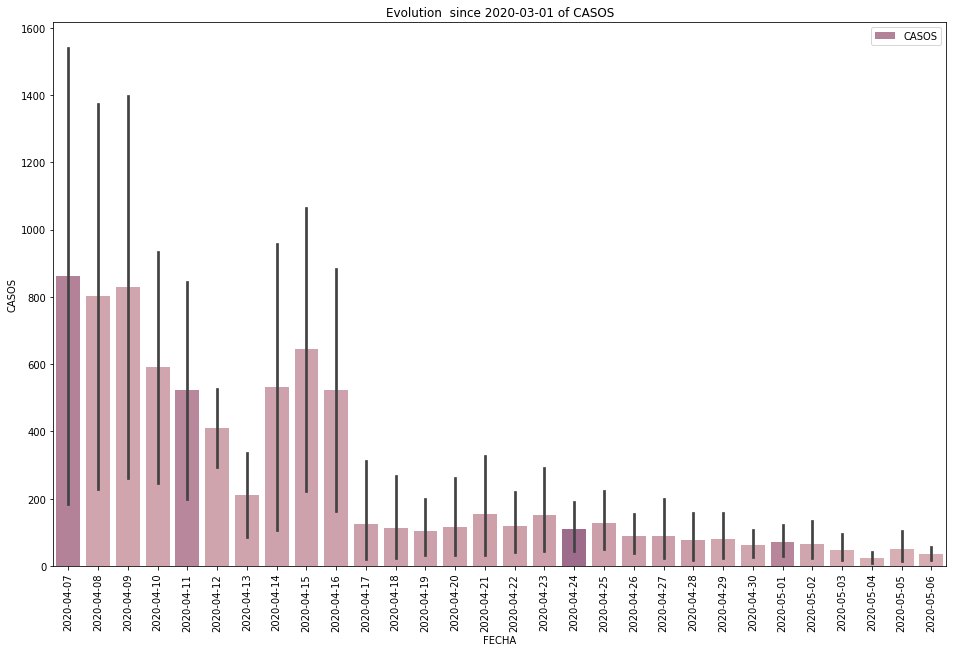

##### Evolution of deaths: 2020-05-06 

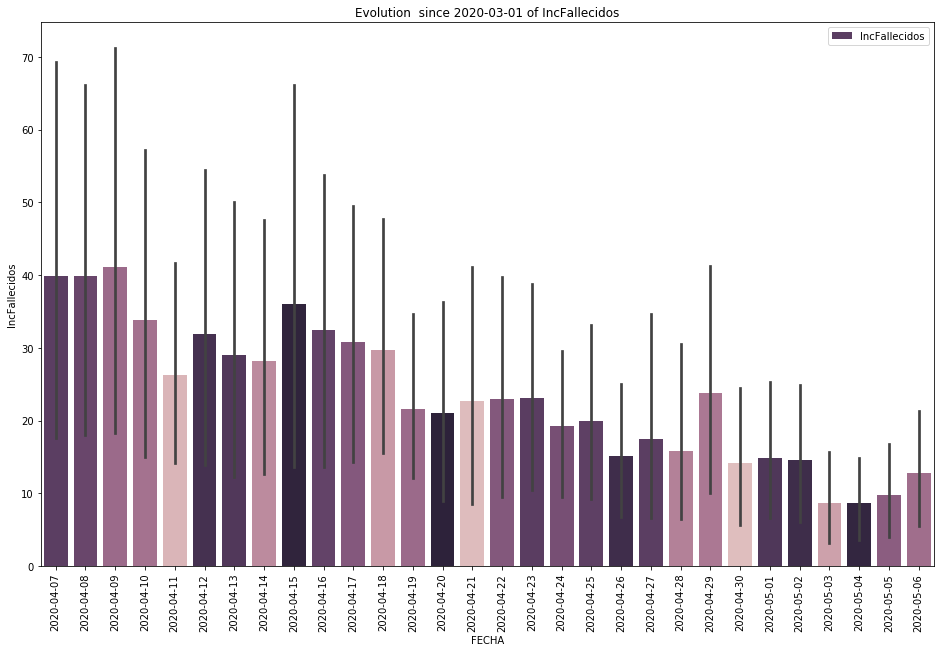

In [20]:
checkSituation(loc=None)

### Checking Madrid situation

#### TODAY'S DATA: 2020-05-06 MD

,FECHA,CCAA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,IncHospitalizados,IncUCI,IncFallecidos,IncRecuperados
564,2020-05-06,MD,116.0,63416.0,4689.0,41031.0,3465.0,8466.0,38331.0,180.0,23.0,46.0,329.0


##### Evolution of cases: 2020-05-06 MD

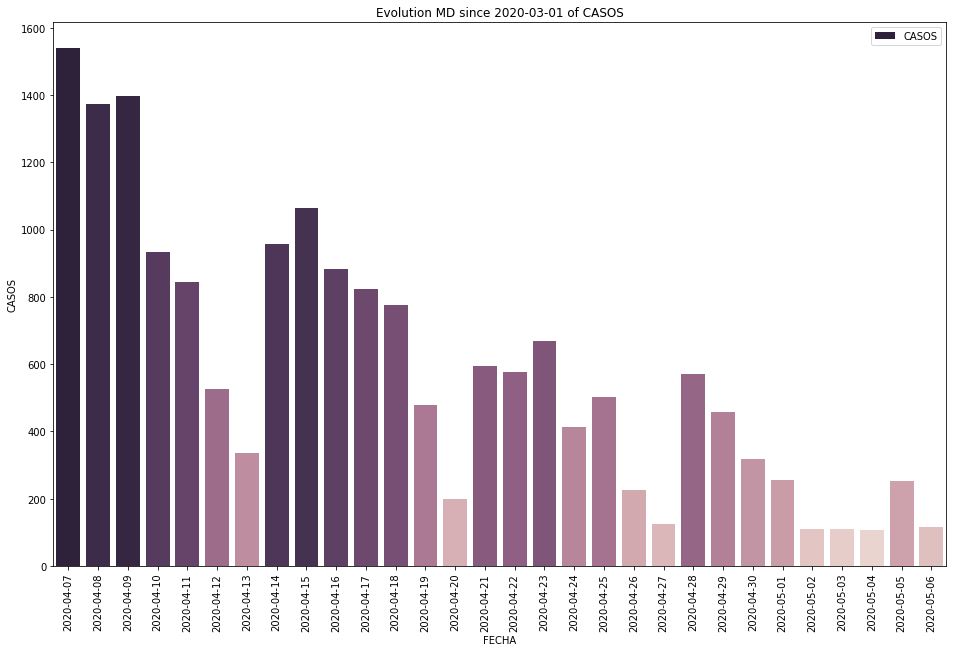

##### Evolution of deaths: 2020-05-06 MD

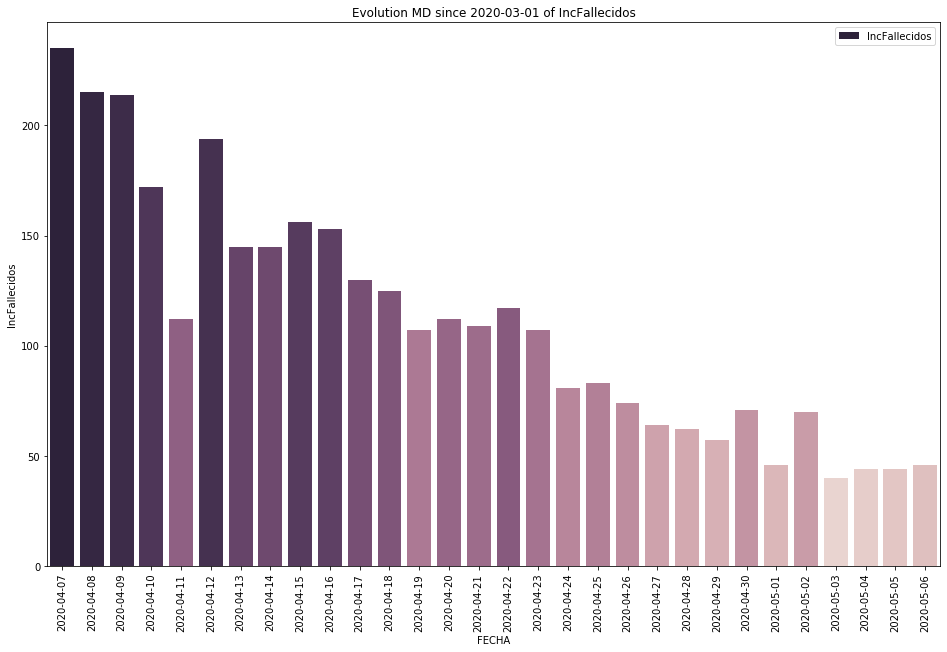

In [21]:
checkSituation(loc='MD')

### Checking Castille-La Mancha situation

#### TODAY'S DATA: 2020-05-06 CM

,FECHA,CCAA,CASOS,PCR+,TestAc+,Hospitalizados,UCI,Fallecidos,Recuperados,IncHospitalizados,IncUCI,IncFallecidos,IncRecuperados
557,2020-05-06,CM,64.0,16144.0,6022.0,8765.0,612.0,2647.0,5862.0,40.0,3.0,31.0,38.0


##### Evolution of cases: 2020-05-06 CM

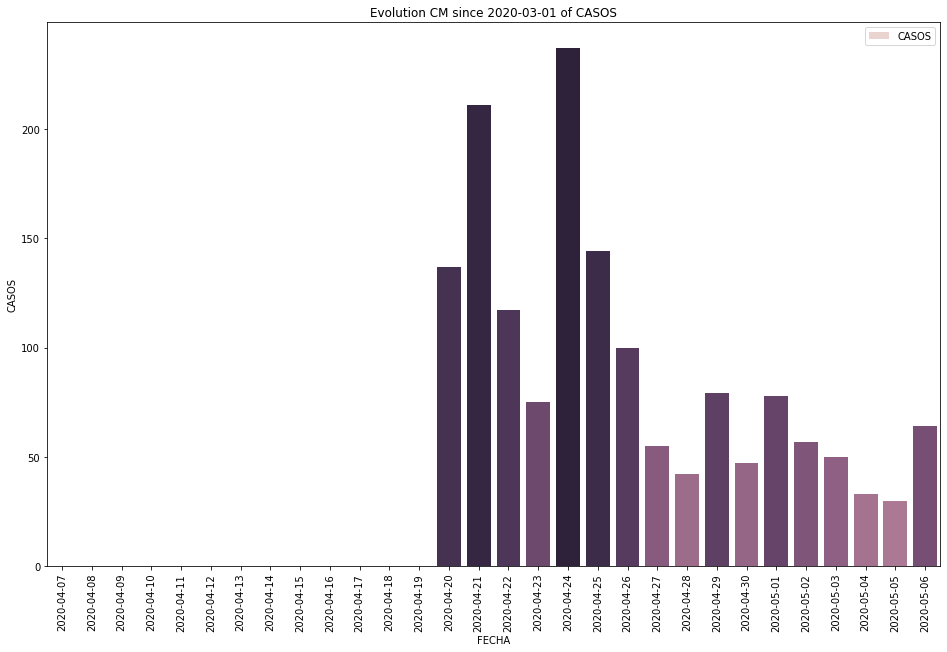

##### Evolution of deaths: 2020-05-06 CM

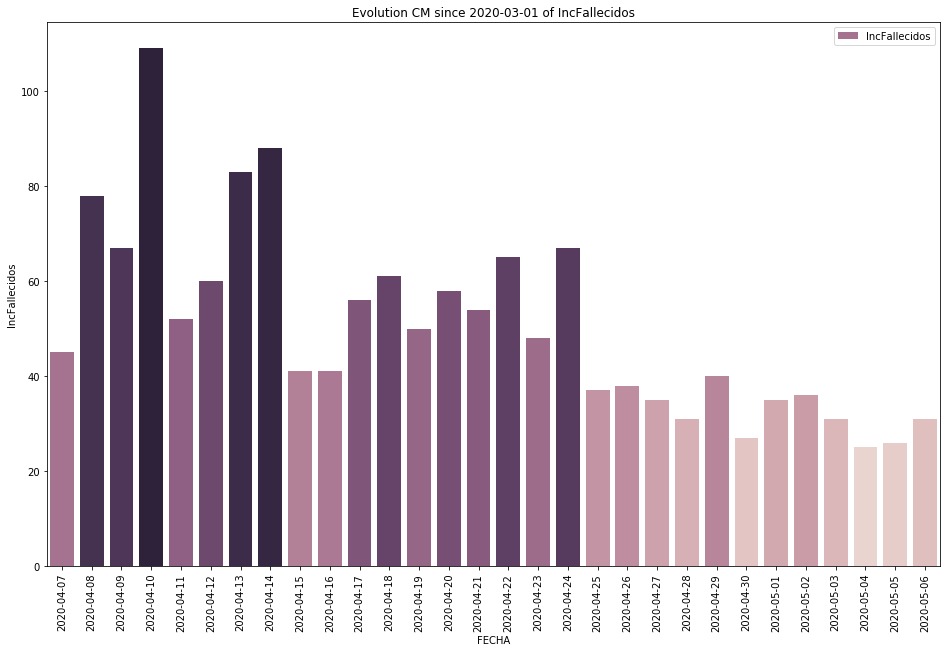

In [22]:
checkSituation(loc='CM')

Ready to work with. Interactive graphs coming soon ; )

### 2. MoMo Dataset

MoMo dataset is aimed to mortality data. Is well prepared and no extra preprocessing is needed in order to have good insights. Here we have the features: 

* ```ambito```: nacional or ccaa (national or regional)
* ```cod_ambito```: empty if nacional. Region ISO code if regional
* ```cod_ine_ambito```: INE region code
* ```nombre_ambito```: Name of the region
* ```cod_sexo```: INE Sex code. man: 1, woman: 6 
* ```nombre_sexo```: Sex name (hombres, mujeres)
* ```cod_gedad```: Age group: menos_65, 65_74, mas_74
* ```nombre_gedad```: name of age group
* ```fecha_defuncion```: decease date
* ```defunciones_observadas```: number of deceases observed (included delay corrections)
* ```defunciones_observadas_lim_inf```: inferior limit of confidence interval
* ```defunciones_observadas_lim_sup```: superior limit of confidence interval
* ```defunciones_esperadas```: expected deceases
* ```defunciones_esperadas_q01```: Percentil 1 of expecteds
* ```defunciones_esperadas_q99```: Percentil 99 of expecteds

In [23]:
momo = pd.read_csv("https://momo.isciii.es/public/momo/data")

In [24]:
display(Markdown("#### Description"))
display(momo.describe())
display(Markdown("#### Head"))
display(momo.head())
display(Markdown("#### Tail"))
display(momo.tail())

#### Description

,cod_ine_ambito,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
count,170772.000000,179760.000000,179760.000000,179760.000000,179760.000000,179760.000000,179760.000000
mean,10.000000,36.840376,36.810756,36.876902,36.027847,27.291711,47.518834
std,5.477242,112.226558,112.181479,112.276121,107.541447,94.979548,125.089280
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,6.310000
50%,10.000000,8.000000,8.000000,8.000000,8.000000,2.690000,15.000000
75%,15.000000,27.000000,27.000000,27.000000,26.500000,16.140000,38.620000
max,19.000000,2466.000000,2466.000000,2466.000000,1325.000000,1174.280000,1691.270000


#### Head

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
0,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-18,1088,1088.0,1088.0,1075.00,959.69,1170.430
1,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-19,1220,1220.0,1220.0,1069.50,959.69,1170.430
2,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-20,1087,1087.0,1087.0,1066.50,959.69,1170.430
3,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-21,1033,1033.0,1033.0,1065.25,959.69,1174.515
4,nacional,NaN,NaN,NaN,all,todos,all,todos,2018-04-22,1049,1049.0,1049.0,1065.25,959.69,1174.515


#### Tail

,ambito,cod_ambito,cod_ine_ambito,nombre_ambito,cod_sexo,nombre_sexo,cod_gedad,nombre_gedad,fecha_defuncion,defunciones_observadas,defunciones_observadas_lim_inf,defunciones_observadas_lim_sup,defunciones_esperadas,defunciones_esperadas_q01,defunciones_esperadas_q99
179755,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-05-01,0,0.000000,0.244171,0.0,0.0,2.0
179756,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-05-02,2,2.000000,2.339587,0.0,0.0,2.0
179757,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-05-03,0,0.000000,0.459361,0.0,0.0,2.0
179758,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-05-04,1,0.509962,1.742396,0.0,0.0,2.0
179759,ccaa,ML,19.0,Melilla,6,mujeres,mas_74,edad > 75,2020-05-05,1,0.177364,1.975701,0.0,0.0,2.0


In [25]:
momo[momo.ambito=='ccaa'].cod_ambito.unique()

array(['AN', 'AR', 'AS', 'IB', 'CN', 'CB', 'CL', 'CM', 'CT', 'VC', 'EX',
       'GA', 'MD', 'MC', 'NC', 'PV', 'RI', 'CE', 'ML'], dtype=object)

In [26]:
def showDeceases(df, location=None, from_date='2020-03-01', sex='all', age='all'):
    """
    df: Pandas DataFrame
    location: string: code of the region
    from_date: string: date to start the time window query. Format YYYY-MM-DD
    sex: string: sex code for filters
    age: string: age code for filters
    """

    if location:
        df = df[df.cod_ambito==location]
    df = df[df.cod_gedad==age]
    df = df[df.cod_sexo==sex]
    df = df[df['fecha_defuncion']>=from_date]

    dates = list(df.fecha_defuncion.unique())
    dates.sort(reverse=False)
    
    pal = sns.cubehelix_palette(len(df))
    rank = df['defunciones_observadas'].argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638

    fig, ax = plt.subplots(1,1, figsize=(16,10))
    sns.barplot(data=df,
                x='fecha_defuncion',
                y='defunciones_observadas',
                label='Observed deceases',
#                palette=np.array(pal[::1])[rank],
                color='lightblue',
                order=dates,
                ax=ax)
    sns.lineplot(data=df,
                 x='fecha_defuncion',
                 y='defunciones_esperadas',
                 label='Expected deceases',
                 markers=True,
                 dashes=False,
                 color='m'
                )
    sns.lineplot(data=df,
                 x='fecha_defuncion',
                 y='defunciones_esperadas_q01',
                 label='Expected deceases (inf)',
                 markers=True,
                 dashes=True,
                 color='y'
                )
    sns.lineplot(data=df,
                 x='fecha_defuncion',
                 y='defunciones_esperadas_q99',
                 label='Expected deceases (sup)',
                 markers=True,
                 dashes=True,
                 color='r'
                )
    plt.xticks(rotation=90)
    plt.title("Deceases {} since {} - Age {} Sex {}".format(location, from_date, age, sex))
    plt.legend()
    plt.show()

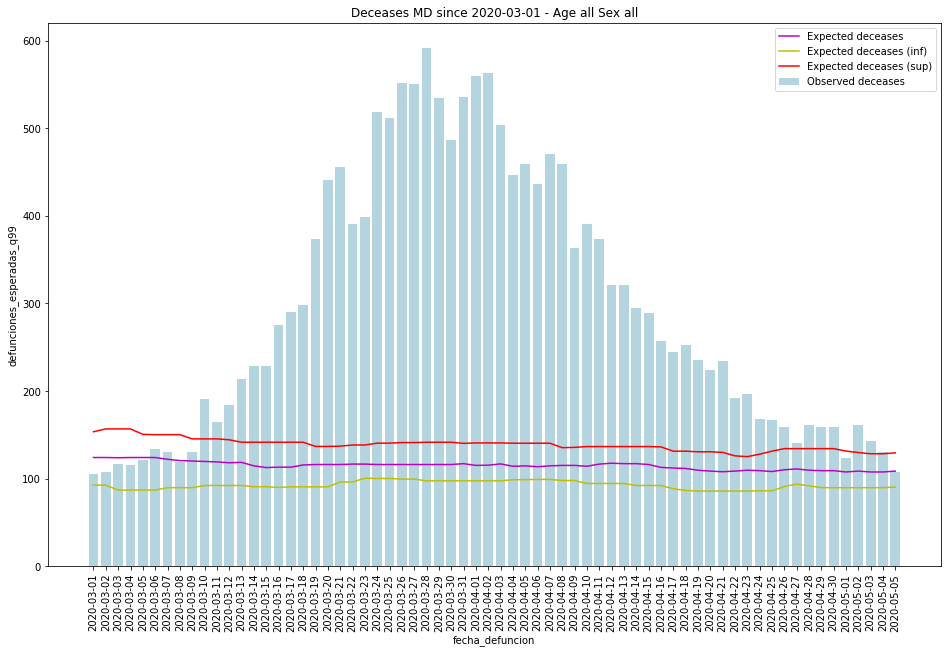

In [27]:
showDeceases(momo, location = 'MD')

### 3. 	European Centre for Disease Prevention and Control

As is said at the [link](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide), the downloadable data file is updated daily and contains the latest available public data on COVID-19. Each row/entry contains the number of new cases reported per day and per country. You may use the data in line with ECDC’s copyright policy.

#### Columns

* ```dateRep```: date of the record (format DD/MM/YYYY)
* ```day```: disaggregated data from ```dateRep```
* ```month```: disaggregated data from ```dateRep```
* ```year```: disaggregated data from ```dateRep```
* ```cases```: number of new cases 
* ```deaths```: number of new deceases
* ```countriesAndTerritories```: name of the country 
* ```geoId```: two letter geolocation identifier
* ```countryterritoryCode```: three letter country code
* ```popData2018```: population accounted at 2018
* ```continentExp```: continent related to that country


In [28]:
eur = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [29]:
display(Markdown("#### Description"))
display(eur.describe())
display(Markdown("#### Head"))
display(eur.head())
display(Markdown("#### Tail"))
display(eur.tail())

#### Description

,day,month,year,cases,deaths,popData2018
count,15282.000000,15282.000000,15282.000000,15282.000000,15282.000000,1.511600e+04
mean,15.732561,3.204358,2019.995616,237.128844,16.809318,5.398725e+07
std,9.161588,1.308127,0.066070,1619.485875,124.285847,1.811408e+08
min,1.000000,1.000000,2019.000000,-1430.000000,0.000000,1.000000e+03
25%,7.000000,2.000000,2020.000000,0.000000,0.000000,2.781677e+06
50%,16.000000,3.000000,2020.000000,2.000000,0.000000,9.942334e+06
75%,24.000000,4.000000,2020.000000,32.000000,1.000000,3.705886e+07
max,31.000000,12.000000,2020.000000,48529.000000,4928.000000,1.392730e+09


#### Head

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,06/05/2020,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
1,05/05/2020,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
2,04/05/2020,4,5,2020,235,13,Afghanistan,AF,AFG,37172386.0,Asia
3,03/05/2020,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
4,02/05/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia


#### Tail

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
15277,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15278,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
15279,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15280,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15281,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [30]:
eur.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

#### Date processing

In order to have an easy way to filter rows, let's generate a date column compliant with format ```YYYY-MM-DD```.

In [31]:
eur['date'] = pd.to_datetime(eur['dateRep'], infer_datetime_format=True).apply(
    lambda x: str(x).split(" ")[0])

In [32]:
def showCases(df, location='ES', from_date='2020-03-01', date_limit=None):
    if not date_limit:
        from datetime import date
        date_limit = date.today().strftime("%Y-%m-%d")

    if type(location) == 'str':
        df = df[df.geoId==location]
    elif type(location) == list:
        df = df[df.geoId.isin(location)]
    
    df = df[df['date']>=from_date]
    df = df[df['date']<=date_limit]

    dates = list(df.date.unique())
    dates.sort(reverse=False)
    
    fig, ax = plt.subplots(1,1, figsize=(16,10))
    sns.barplot(data=df,
                x='date',
                y='cases',
                label='Observed infections',
                color='lightblue',
                order=dates,
                ax=ax)
    sns.lineplot(data=df,
                 x='date',
                 y='deaths',
                 label='Deaths',
                 markers=True,
                 dashes=True,
                 color='m'
                )
    plt.xticks(rotation=90)
    plt.title("Cases {} since {}".format(location or "Europe", from_date))
    plt.legend()
    plt.show()

In [33]:
eur.geoId.unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'JPG11668', 'KY', 'CF', 'TD', 'CL', 'CN',
       'CO', 'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD',
       'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ',
       'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW', 'MY',
       'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME', 'MS',
       'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG',
       'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA', 'PG

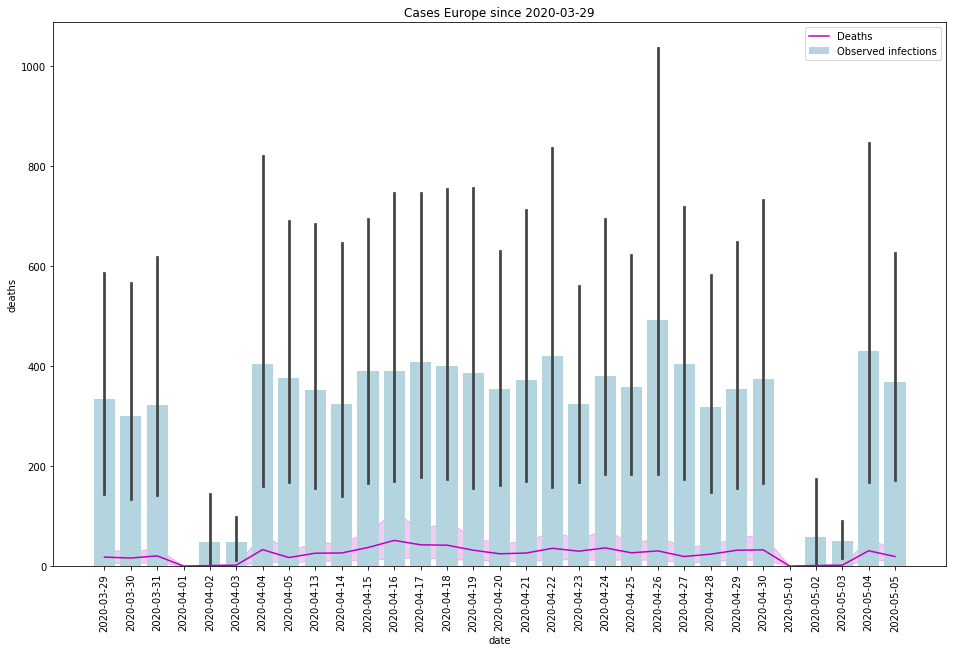

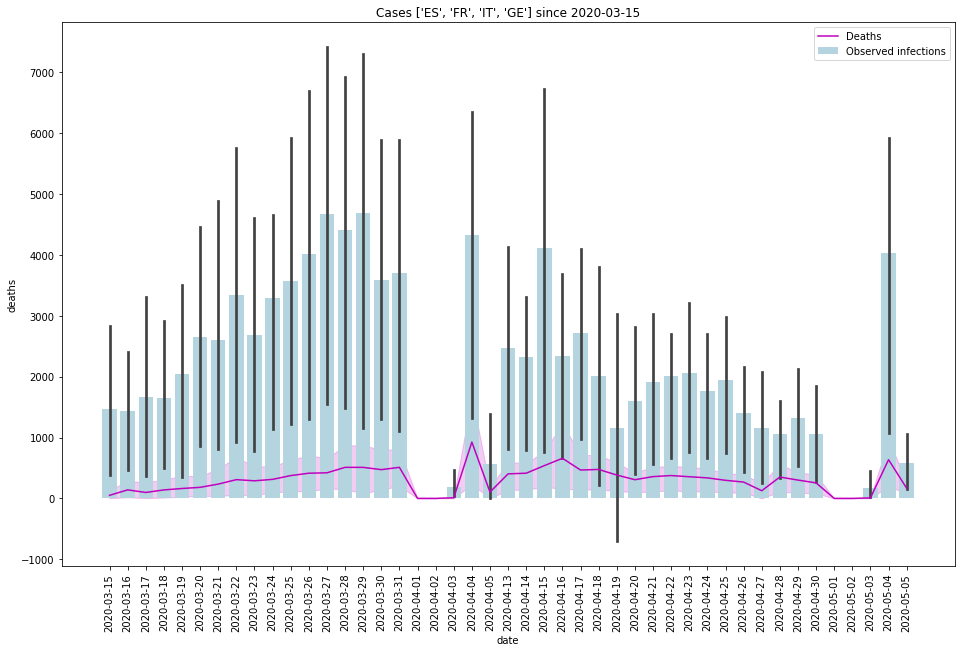

In [34]:
showCases(eur, location=None, from_date='2020-03-29')
showCases(eur, location=['ES', 'FR', 'IT', 'GE'], from_date='2020-03-15')